In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr
import xlwings as xw
from itertools import product

In [58]:
caminho_mensal_gare = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE"
df_fundos_corretoras = pd.read_excel(f"{caminho_mensal_gare}\\Corretoras_Fundos_-_Janeiro.xlsx")
dfMENSAL = pd.read_excel(f"{caminho_mensal_gare}\\BASE_MENSAL_GARE_JAN.xlsx")
dfMENSAL = dfMENSAL.rename(columns={'CATEGORIAS ATUAIS':'CATEGORIAS_ATUAIS', 'CATEGORIAS ANTIGAS':'CATEGORIAS_ANTIGAS'})
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                      'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                    'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

#INSIRO O CAMINHO DAS FONTES
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)

#FAÇO O MATPLTOLIB RECONHEÇER AS FONTES COMO FAMILIARIES
plt.rcParams['font.family'] = Avenir.get_name()
plt.rcParams['font.family'] = Avenir.get_name()

o valor de compra é 391925140.82 e o valor de venda é 385818833.02, e o total é 777743973.8399999


In [59]:
def graf_barras_zeragens(
    df,
    filename,
    color='#3B5279',
    figsize=(8, 4),
    width=0.8,
    fontsize_y=2,
    fontsize_label=9,
    font=Avenir
):

    fig, ax = plt.subplots(figsize=figsize)

    sb.barplot(
        data=df,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        ax=ax,
        color=color,
        dodge=True,
        width=width
    )

    ylabels = df['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font)

    for p in ax.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label,
                fontproperties=font
            )

    # Ajustar as bordas
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename, transparent=True, dpi=300, bbox_inches='tight')
    


def graf_compra_e_venda(
        df_cv,
        filename_cv,
        palette_cv={'Venda': '#767070', 'Compra': '#3B5279'},
        figsize_cv=(8, 4),
        width_cv=0.8,
        fontsize_y=2,
        fontsize_label_cv=9,
        font_cv=Avenir
):
    fig, ax = plt.subplots(figsize=figsize_cv)

    sb.barplot(
        data=df_cv,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        hue='OPERAÇÃO',
        ax=ax,
        palette=palette_cv,
        dodge=True,
        width=width_cv
    )

    # usa o DataFrame certo
    ylabels = df_cv['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font_cv)

    for p in ax.patches:
        # Obtém a largura (valor de x) e a posição do centro da barra
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        # Adiciona rótulos formatados com separador de milhares
        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label_cv,
                fontproperties=font_cv
            )

    # Ajustar os spines (bordas)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')

import matplotlib.pyplot as plt
import os

def plotar_grafico_horizontal_empilhado(df, filename_cv):
    # Define paleta de cores
    cores = {
        'VENDA': '#767070',
        'COMPRA': '#3B5279',
        'ZERAGENS': '#AFABAB'
    }

    categorias = df['CATEGORIAS_ANTIGAS'].to_numpy()
    vendas = df['VENDA'].to_numpy()
    compras = df['COMPRA'].to_numpy()
    zeragens = df['ZERAGENS'].to_numpy()

    fig, ax = plt.subplots(figsize=(8, 4))

    bars1 = ax.barh(categorias, vendas, color=cores['VENDA'])
    bars2 = ax.barh(categorias, compras, left=vendas, color=cores['COMPRA'])
    bars3 = ax.barh(categorias, zeragens, left=vendas + compras, color=cores['ZERAGENS'])

    for i in range(len(categorias)):
        ax.text(vendas[i] / 2, i, f'{int(vendas[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='white')
        ax.text(vendas[i] + compras[i] / 2, i, f'{int(compras[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='white')
        ax.text(vendas[i] + compras[i] + zeragens[i] / 2, i, f'{int(zeragens[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='black')

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(True)
    for spine_name, spine in ax.spines.items():
        spine.set_visible(spine_name == 'left')

    ax.invert_yaxis()

    plt.tight_layout()
    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')


def garantir_categorias_completas(
    df: pd.DataFrame,
    categoria_col="CATEGORIAS",
    operacao_col="OPERAÇÃO",
    pfpj_col="PF_PJ",
    classe_col="CLASSE_CATEGORIA",
    categorias_esperadas=range(1, 11),
    pfpj_esperado=("PF", "PJ"),
):
    mapa_classe_categoria = {
        1: "0-1k",
        2: "1k-5k",
        3: "5k-20k",
        4: "20k-50k",
        5: "50k-100k",
        6: "100k-500k",
        7: "500k-1M",
        8: "1M-3M",
        9: "3M-15M",
        10: ">15M"
    }

    df = df.copy()

    # 1) NORMALIZA o tipo da categoria (resolve o bug clássico int vs str)
    df[categoria_col] = pd.to_numeric(df[categoria_col], errors="coerce").astype("Int64")

    # 2) Detecta a operação (Compra ou Venda) — exige apenas uma
    operacoes = df[operacao_col].dropna().unique()
    if len(operacoes) != 1:
        raise ValueError("Esperado dataframe com apenas um tipo de OPERAÇÃO (somente Compra ou somente Venda).")
    operacao = operacoes[0]

    # 3) Se existirem duplicatas por chave (CATEGORIAS + PF_PJ), agrega antes
    chaves = [categoria_col, pfpj_col]
    if df.duplicated(chaves).any():
        cols_num = df.select_dtypes(include="number").columns
        agg = {c: "sum" for c in cols_num}
        # mantém a operação/strings coerentes (pega o primeiro)
        for c in df.columns:
            if c not in agg and c not in chaves:
                agg[c] = "first"
        df = df.groupby(chaves, as_index=False).agg(agg)

    # 4) Cria a GRADE completa esperada (1..10 x PF/PJ)
    base = pd.DataFrame(list(product(list(categorias_esperadas), list(pfpj_esperado))),
                        columns=[categoria_col, pfpj_col])

    base[operacao_col] = operacao
    base["OPERAÇÃO_PF_PJ"] = base.apply(lambda r: f"{operacao} {r[pfpj_col]}", axis=1)
    base["VAR_PRECO"] = 0.0
    base["% PARTICIPAÇÃO"] = 0.0
    base[classe_col] = base[categoria_col].map(mapa_classe_categoria)

    # 5) Merge: o que existe no df REAL sobrescreve a base sintética
    out = base.merge(df, on=chaves, how="left", suffixes=("_base", ""))

    # Para colunas que existem nos dois, prioriza as do df original quando vierem preenchidas
    for col in base.columns:
        if col in out.columns and f"{col}_base" in out.columns:
            out[col] = out[col].combine_first(out[f"{col}_base"])
            out.drop(columns=[f"{col}_base"], inplace=True)

    # 6) Ordena para ficar bonito/consistente
    out = out.sort_values([categoria_col, pfpj_col]).reset_index(drop=True)

    return out



In [60]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 100.0 e o total de venda é 99.99999999999999


In [61]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,29407338.85,Compra PF,7.50,0-1k
1,1,Compra,PJ,838213.73,Compra PJ,0.21,0-1k
2,2,Compra,PF,41038197.98,Compra PF,10.47,1k-5k
3,2,Compra,PJ,4499067.16,Compra PJ,1.15,1k-5k
4,3,Compra,PF,47781022.50,Compra PF,12.19,5k-20k
5,3,Compra,PJ,194049.18,Compra PJ,0.05,5k-20k
6,4,Compra,PF,43160167.70,Compra PF,11.01,20k-50k
7,4,Compra,PJ,518983.95,Compra PJ,0.13,20k-50k
8,5,Compra,PF,51363415.43,Compra PF,13.11,50k-100k
9,5,Compra,PJ,2955504.30,Compra PJ,0.75,50k-100k


In [62]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-4.373782e+06,Venda PF,-1.13,0-1k
1,1,Venda,PJ,-3.153370e+03,Venda PJ,-0.00,0-1k
2,2,Venda,PF,-9.895681e+06,Venda PF,-2.56,1k-5k
3,2,Venda,PJ,-5.960465e+04,Venda PJ,-0.02,1k-5k
4,3,Venda,PF,-1.501555e+07,Venda PF,-3.89,5k-20k
5,3,Venda,PJ,-4.905763e+04,Venda PJ,-0.01,5k-20k
6,4,Venda,PF,-2.268501e+07,Venda PF,-5.88,20k-50k
7,4,Venda,PJ,-1.688290e+06,Venda PJ,-0.44,20k-50k
8,5,Venda,PF,-2.742149e+07,Venda PF,-7.11,50k-100k
9,5,Venda,PJ,-2.580250e+05,Venda PJ,-0.07,50k-100k


In [63]:
plim = garantir_categorias_completas(plim)
v = garantir_categorias_completas(v)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_37076\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next L

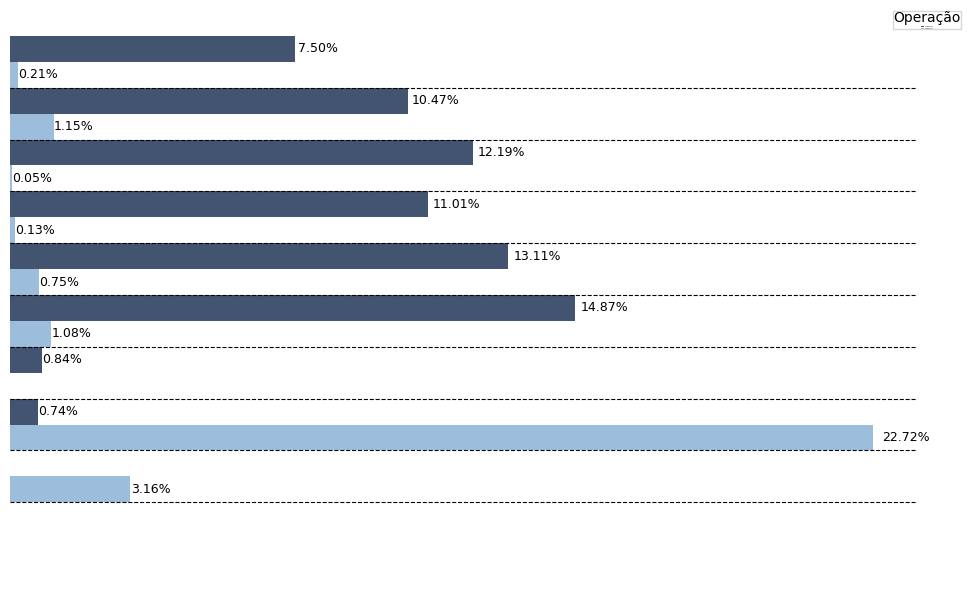

In [64]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_37076\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT P

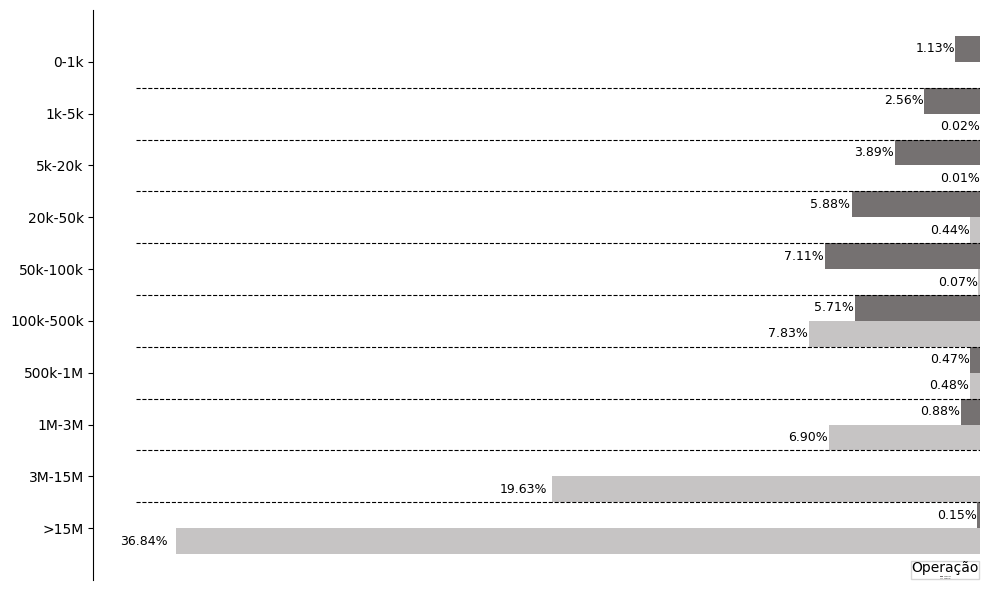

In [65]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [66]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
of = 'GARE15'
of2 = 'GALG15'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais,of,of2]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15
NOME,,,,,,
BR PARTNERS BANCO DE INVESTIMENTO S/A,1M-3M,PJ,69739352.05,3M-15M,AUSENTE,AUSENTE
TIVIO OPPORTUNITIES MASTER FUNDO DE INVESTIMENTO IMOBILIARIO,3M-15M,PJ,8008880.88,3M-15M,AUSENTE,AUSENTE
CAPITANIA PREV ADVISORY XP SEGUROS FIFE FUNDO DE INVESTIMENT,1M-3M,PJ,5694968.80,1M-3M,AUSENTE,AUSENTE
JS ATIVOS FINANCEIROS FIM,1M-3M,PJ,5611241.72,>15M,AUSENTE,AUSENTE
XTX MARKETS TRADING LIMITED,1M-3M,PJ,5581632.50,1M-3M,AUSENTE,AUSENTE
MR SOLAR SUPERMERCADOS LTDA,3M-15M,PJ,4374216.50,3M-15M,AUSENTE,AUSENTE
BTG PACTUAL REAL ESTATE HEDGE FUND FII - RESP LTDA,1k-5k,PJ,4236565.68,50k-100k,AUSENTE,AUSENTE
MAG MULTIESTRATEGIA CLASSE DE INVESTIMENTO IMOBILIARIO RESPO,100k-500k,PJ,2690237.60,3M-15M,AUSENTE,AUSENTE
XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,2672100.18,50k-100k,AUSENTE,AUSENTE


In [67]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS_ATUAIS'] = TOP10_Venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

TOP10_Venda = TOP10_Venda.set_index('NOME')

TOP10_Venda

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15
NOME,,,,,,
BR PARTNERS BANCO DE INVESTIMENTO S/A,3M-15M,PJ,71521065.58,3M-15M,AUSENTE,AUSENTE
PPCM FUNDO DE INVESTIMENTO IMOBILIARIO RESP LIMITADA,>15M,PJ,51791000.00,>15M,AUSENTE,AUSENTE
BTG PACTUAL REAL ESTATE HEDGE FUND FII - RESP LTDA,100k-500k,PJ,26922338.56,>15M,AUSENTE,AUSENTE
MAU CAPITAL REAL ESTATE FDO DE INV IMOB,>15M,PJ,18831298.24,0-1k,AUSENTE,AUSENTE
OPORTUNIDADES IMOBILI RIAS I FUNDO DE INVESTIMENTO IMOBILI R,>15M,PJ,18320513.73,3M-15M,AUSENTE,AUSENTE
AAA FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO PRIVADO INVES,>15M,PJ,16422630.22,>15M,AUSENTE,AUSENTE
CAPITANIA REIT MASTER CP FIC DE FIM,>15M,PJ,12246488.20,>15M,AUSENTE,AUSENTE
JS ATIVOS FINANCEIROS FIM,1M-3M,PJ,12097494.27,>15M,AUSENTE,AUSENTE
BPG III LOGSTICA FUNDO DE INVESTIMENTO EM PARTICIPAES MULTIE,>15M,PJ,10887308.16,>15M,AUSENTE,AUSENTE


In [68]:
cont_dfcompra = dfCOMPRA['NOME'].value_counts().reset_index()
cont_dfcompra.columns=['NOME', 'count']

acomp_PJ_compra = dfCOMPRA_final.query('PF_PJ == "PJ"')

compra_pj = acomp_PJ_compra[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

top10pj_compra = compra_pj.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

top10pj_compra['VAR_PRECO'] = top10pj_compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

top10pj_compra['CATEGORIAS'] = top10pj_compra['CATEGORIAS'].map(mapear)

top10pj_compra['CATEGORIAS_ATUAIS'] = top10pj_compra['CATEGORIAS_ATUAIS'].fillna('0-1k')


top10pj_compra = top10pj_compra.set_index('NOME')

top10pj_compra_final = top10pj_compra.merge(cont_dfcompra, on="NOME",how='left')

top10pj_compra_final['count'] = top10pj_compra_final['count'].fillna(0).astype(float)

top10pj_compra_final['VAR_PRECO'] = top10pj_compra_final['VAR_PRECO'].astype(float)

top10pj_compra_final['PACE'] = top10pj_compra_final['VAR_PRECO']/top10pj_compra_final['count']

top10pj_compra_final['PACE'] = top10pj_compra_final['PACE'].round(0)

top10pj_compra_final = top10pj_compra_final.rename(columns={'count':'COMPRAS'})

top10pj_compra_final


,NOME,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15,COMPRAS,PACE
0,BR PARTNERS BANCO DE INVESTIMENTO S/A,1M-3M,PJ,69739352.05,3M-15M,AUSENTE,AUSENTE,5.0,13947870.0
1,TIVIO OPPORTUNITIES MASTER FUNDO DE INVESTIMEN...,3M-15M,PJ,8008880.88,3M-15M,AUSENTE,AUSENTE,1.0,8008881.0
2,CAPITANIA PREV ADVISORY XP SEGUROS FIFE FUNDO ...,1M-3M,PJ,5694968.80,1M-3M,AUSENTE,AUSENTE,5.0,1138994.0
3,JS ATIVOS FINANCEIROS FIM,1M-3M,PJ,5611241.72,>15M,AUSENTE,AUSENTE,3.0,1870414.0
4,XTX MARKETS TRADING LIMITED,1M-3M,PJ,5581632.50,1M-3M,AUSENTE,AUSENTE,9.0,620181.0
5,MR SOLAR SUPERMERCADOS LTDA,3M-15M,PJ,4374216.50,3M-15M,AUSENTE,AUSENTE,1.0,4374216.0
6,BTG PACTUAL REAL ESTATE HEDGE FUND FII - RESP ...,1k-5k,PJ,4236565.68,50k-100k,AUSENTE,AUSENTE,4.0,1059141.0
7,MAG MULTIESTRATEGIA CLASSE DE INVESTIMENTO IMO...,100k-500k,PJ,2690237.60,3M-15M,AUSENTE,AUSENTE,5.0,538048.0
8,XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,2672100.18,50k-100k,AUSENTE,AUSENTE,8.0,334013.0
9,AVEL CORRETORA DE SEGUROS E SERVICOS FINANCEIR...,1M-3M,PJ,1732091.30,1M-3M,AUSENTE,AUSENTE,1.0,1732091.0


In [69]:
cont_dfvenda = dfVENDA['NOME'].value_counts().reset_index()
cont_dfvenda.columns=['NOME', 'count']

acomp_PJ_venda = dfVENDA_final.query('PF_PJ == "PJ"')

venda_pj = acomp_PJ_venda[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

top10pj_venda = venda_pj.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

top10pj_venda['VAR_PRECO'] = top10pj_venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

top10pj_venda['CATEGORIAS'] = top10pj_venda['CATEGORIAS'].map(mapear)

top10pj_venda['CATEGORIAS_ATUAIS'] = top10pj_venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

top10pj_venda.set_index('NOME')

top10pj_venda_final = top10pj_venda.merge(cont_dfvenda, on='NOME', how='left')

top10pj_venda_final['count'] = top10pj_venda_final['count'].fillna(0).astype(float)

top10pj_venda_final['VAR_PRECO'] = top10pj_venda_final['VAR_PRECO'].fillna(0).astype(float)

top10pj_venda_final['PACE'] = (top10pj_venda_final['VAR_PRECO']/top10pj_venda_final['count']).round(0)

top10pj_venda_final = top10pj_venda_final.rename(columns={'count':'VENDAS'})

top10pj_venda_final


,NOME,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15,VENDAS,PACE
0,BR PARTNERS BANCO DE INVESTIMENTO S/A,3M-15M,PJ,71521065.58,3M-15M,AUSENTE,AUSENTE,12.0,5960089.0
1,PPCM FUNDO DE INVESTIMENTO IMOBILIARIO RESP LI...,>15M,PJ,51791000.00,>15M,AUSENTE,AUSENTE,2.0,25895500.0
2,BTG PACTUAL REAL ESTATE HEDGE FUND FII - RESP ...,100k-500k,PJ,26922338.56,>15M,AUSENTE,AUSENTE,5.0,5384468.0
3,MAU CAPITAL REAL ESTATE FDO DE INV IMOB,>15M,PJ,18831298.24,0-1k,AUSENTE,AUSENTE,1.0,18831298.0
4,OPORTUNIDADES IMOBILI RIAS I FUNDO DE INVESTIM...,>15M,PJ,18320513.73,3M-15M,AUSENTE,AUSENTE,4.0,4580128.0
5,AAA FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO...,>15M,PJ,16422630.22,>15M,AUSENTE,AUSENTE,19.0,864349.0
6,CAPITANIA REIT MASTER CP FIC DE FIM,>15M,PJ,12246488.20,>15M,AUSENTE,AUSENTE,5.0,2449298.0
7,JS ATIVOS FINANCEIROS FIM,1M-3M,PJ,12097494.27,>15M,AUSENTE,AUSENTE,4.0,3024374.0
8,BPG III LOGSTICA FUNDO DE INVESTIMENTO EM PART...,>15M,PJ,10887308.16,>15M,AUSENTE,AUSENTE,11.0,989755.0
9,CAPITANIA SECURITIES II FDO IN,>15M,PJ,7869358.52,>15M,AUSENTE,AUSENTE,5.0,1573872.0


# CATEGORIAS QUE MAIS COMPRARAM E VENDERAM

In [70]:
mapa = {'0-1k':1, '1k-5k':2, '5k-20k':3, '20k-50k':4, '50k-100k':5, '100k-500k':6, '500k-1M':7, '1M-3M':8, '3M-15M':9, '>15M':10}

CGCV_df = dfMENSAL.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum().reset_index()

CGCV_df['CATEGORIAS_NUMERICAS'] = CGCV_df['CATEGORIAS_ANTIGAS'].map(mapa)
CGCV_df = CGCV_df.sort_values(['CATEGORIAS_NUMERICAS', 'OPERAÇÃO'], ascending=[True, False])

CGCV_sorted = CGCV_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])

CGCV_sorted = (CGCV_sorted['VAR_PRECO']/1000).round(0)

CGCV_dataf = pd.DataFrame(CGCV_sorted)

CGCV_dataf = CGCV_dataf.reset_index()

CGCV_dataf

,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,OPERAÇÃO,VAR_PRECO
0,1,0-1k,Venda,4383.0
1,1,0-1k,Compra,28137.0
2,2,1k-5k,Venda,9871.0
3,2,1k-5k,Compra,43851.0
4,3,5k-20k,Venda,15407.0
5,3,5k-20k,Compra,49272.0
6,4,20k-50k,Venda,23027.0
7,4,20k-50k,Compra,42284.0
8,5,50k-100k,Venda,28245.0
9,5,50k-100k,Compra,53279.0


In [71]:
def zeragem(ca):
    if ca == 0:
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['FINANCEIRO_NOVO'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')


CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.reset_index()
CMZ_cotistas['CATEGORIAS_NUMERICAS'] = CMZ_cotistas['CATEGORIAS_ANTIGAS'].map(mapa)
CMZ_cotistas = CMZ_cotistas.sort_values(['CATEGORIAS_NUMERICAS'], ascending=[True])



CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,18483
1,2,1k-5k,3590
2,3,5k-20k,1188
3,4,20k-50k,504
4,5,50k-100k,376
5,6,100k-500k,81
6,7,500k-1M,2
7,8,1M-3M,6
8,10,>15M,1


In [72]:
mapa = {
    '0-1k': 1, '1k-5k': 2, '5k-20k': 3, '20k-50k': 4,
    '50k-100k': 5, '100k-500k': 6, '500k-1M': 7,
    '1M-3M': 8, '3M-15M': 9, '>15M': 10
}

def montar_df_pivot(dfVENDA_final, dfCOMPRA_final, dfZERADOS, mapa):
    # --- VENDA ---
    venda = (
        dfVENDA_final
        .query("OPERAÇÃO == 'Venda'")  # garante só venda
        .groupby("CATEGORIAS_ANTIGAS", as_index=False)["VAR_PRECO"]
        .sum()
        .rename(columns={"VAR_PRECO": "VENDA"})
    )

    # --- COMPRA ---
    compra = (
        dfCOMPRA_final
        .query("OPERAÇÃO == 'Compra'")  # garante só compra
        .groupby("CATEGORIAS_ANTIGAS", as_index=False)["VAR_PRECO"]
        .sum()
        .rename(columns={"VAR_PRECO": "COMPRA"})
    )

    # --- ZERAGENS ---
    zeragens = (
        dfZERADOS
        .groupby("CATEGORIAS_ANTIGAS", as_index=False)["VAR_PRECO"]
        .sum()
        .rename(columns={"VAR_PRECO": "ZERAGENS"})
    )

    # --- MERGE em uma base só ---
    df_pivot = (
        venda.merge(compra, on="CATEGORIAS_ANTIGAS", how="outer")
             .merge(zeragens, on="CATEGORIAS_ANTIGAS", how="outer")
    )

    # Preenche ausências
    for col in ["COMPRA", "VENDA", "ZERAGENS"]:
        if col not in df_pivot.columns:
            df_pivot[col] = 0.0
    df_pivot[["COMPRA", "VENDA", "ZERAGENS"]] = df_pivot[["COMPRA", "VENDA", "ZERAGENS"]].fillna(0)

    # Converte para milhares e arredonda
    df_pivot[["COMPRA", "VENDA", "ZERAGENS"]] = (df_pivot[["COMPRA", "VENDA", "ZERAGENS"]] / 1000).round(0)

    # Ordena por mapa
    df_pivot["CATEGORIAS_NUMERICAS"] = df_pivot["CATEGORIAS_ANTIGAS"].map(mapa)
    df_pivot = df_pivot.sort_values("CATEGORIAS_NUMERICAS").drop(columns="CATEGORIAS_NUMERICAS")

    # Ordem final das colunas
    df_pivot = df_pivot[["CATEGORIAS_ANTIGAS", "COMPRA", "VENDA", "ZERAGENS"]]

    return df_pivot

df_pivot = montar_df_pivot(dfVENDA_final, dfCOMPRA_final, dfZERADOS, mapa)
df_pivot

,CATEGORIAS_ANTIGAS,COMPRA,VENDA,ZERAGENS
0,0-1k,30246.0,4377.0,3834.0
3,1k-5k,45537.0,9955.0,8276.0
8,5k-20k,47975.0,15065.0,12043.0
4,20k-50k,43679.0,24373.0,20124.0
7,50k-100k,54319.0,27680.0,24806.0
1,100k-500k,62534.0,52250.0,16719.0
6,500k-1M,3307.0,3674.0,1355.0
2,1M-3M,91945.0,30008.0,16180.0
5,3M-15M,12383.0,75730.0,0.0
9,>15M,0.0,142708.0,18831.0


# CATEGORIAS QUE MAIS ZERARAM

In [73]:
def zeragem(ca):
    if ca == 0:
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['FINANCEIRO_NOVO'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')


CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.reset_index()
CMZ_cotistas['CATEGORIAS_NUMERICAS'] = CMZ_cotistas['CATEGORIAS_ANTIGAS'].map(mapa)
CMZ_cotistas = CMZ_cotistas.sort_values(['CATEGORIAS_NUMERICAS'], ascending=[True])



CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,18483
1,2,1k-5k,3590
2,3,5k-20k,1188
3,4,20k-50k,504
4,5,50k-100k,376
5,6,100k-500k,81
6,7,500k-1M,2
7,8,1M-3M,6
8,10,>15M,1


# DATA DE MAIORES ZERAGENS EM VOL FINANCEIRO

# ACOMPANHAMENTO COTISTAS COM TAG GARE15 E GALG15

In [74]:
dfVENDA_GARE15 = dfVENDA_final.query('GARE15 == "GARE15"')
dfZERAGEM_GARE15 = dfVENDA_GARE15.query('ZERAGEM == "Zerou"')
dfCOMPRA_GARE15 = dfCOMPRA_final.query('GARE15 == "GARE15"')

dfG15_pivot = montar_df_pivot(dfVENDA_GARE15, dfCOMPRA_GARE15, dfZERAGEM_GARE15, mapa)
dfG15_pivot

,CATEGORIAS_ANTIGAS,COMPRA,VENDA,ZERAGENS
0,0-1k,1350.0,2.0,2.0
3,1k-5k,1003.0,91.0,76.0
7,5k-20k,876.0,588.0,530.0
4,20k-50k,5386.0,3940.0,3653.0
6,50k-100k,8920.0,7350.0,6849.0
1,100k-500k,12684.0,5541.0,4553.0
5,500k-1M,106.0,0.0,0.0
2,1M-3M,1931.0,3080.0,3057.0


In [75]:
dfZERAGEM_GARE15 = dfVENDA_GARE15.query('ZERAGEM == "Zerou"')
G15_ZERADOS = dfZERAGEM_GARE15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
G15_ZERADOS.sort_values(ascending=False)

zero_GARE15_qtde = pd.DataFrame(G15_ZERADOS)
zero_GARE15_qtde = zero_GARE15_qtde.sort_values(['VAR_PRECO'], ascending=False)
zero_GARE15_qtde = zero_GARE15_qtde.reset_index()
zero_GARE15_qtde['CATEGORIAS_NUMERICAS'] = zero_GARE15_qtde['CATEGORIAS_ANTIGAS'].map(mapa)
zero_GARE15_qtde = zero_GARE15_qtde.sort_values(['CATEGORIAS_NUMERICAS'], ascending=True)
zero_GARE15_qtde = zero_GARE15_qtde.set_index(['CATEGORIAS_NUMERICAS', 'CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
zero_GARE15_qtde = zero_GARE15_qtde.reset_index()
zero_GARE15_qtde

,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,4
1,2,1k-5k,18
2,3,5k-20k,48
3,4,20k-50k,86
4,5,50k-100k,101
5,6,100k-500k,22
6,8,1M-3M,2


findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

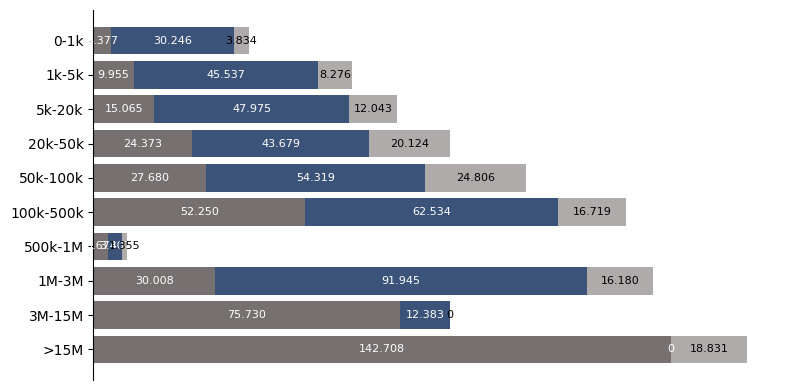

In [76]:
plotar_grafico_horizontal_empilhado(df = df_pivot, 
                                    filename_cv='grafico_horizontal.png')

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

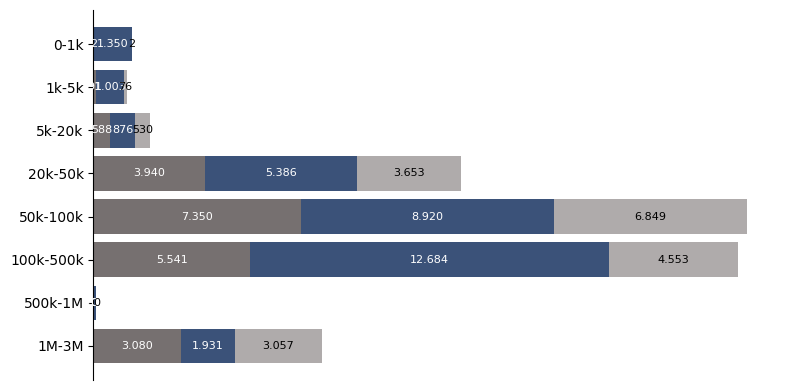

In [77]:
plotar_grafico_horizontal_empilhado(df = dfG15_pivot, 
                                    filename_cv='grafico_horizontal_GARE15.png')

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

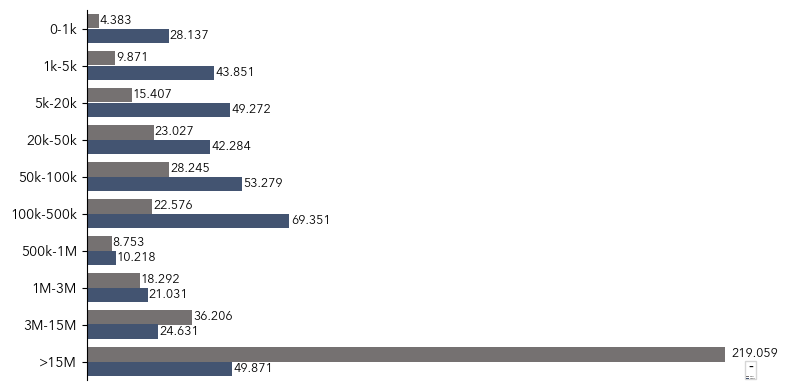

In [78]:
graf_compra_e_venda(
    df_cv=CGCV_dataf,
    filename_cv='CATEGORIAS_MCV.png',
    palette_cv={'Venda':'#767070', 'Compra':'#3B5279'}
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_37076\4177929682.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

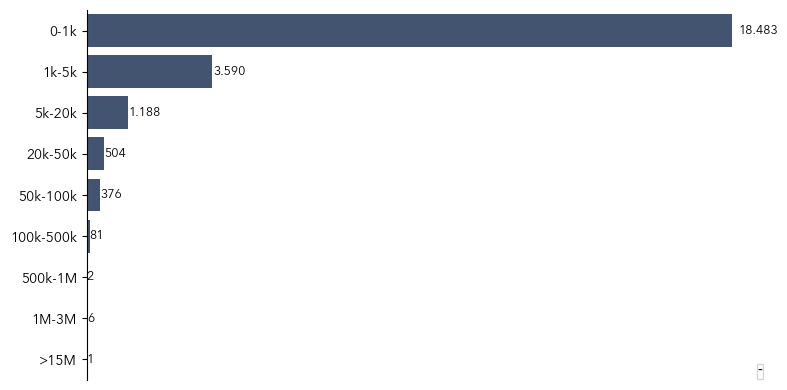

In [79]:
graf_barras_zeragens(
    df=CMZ_cotistas_df,
    filename='CATEGORIAS_zeragem_cotistas.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_37076\4177929682.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

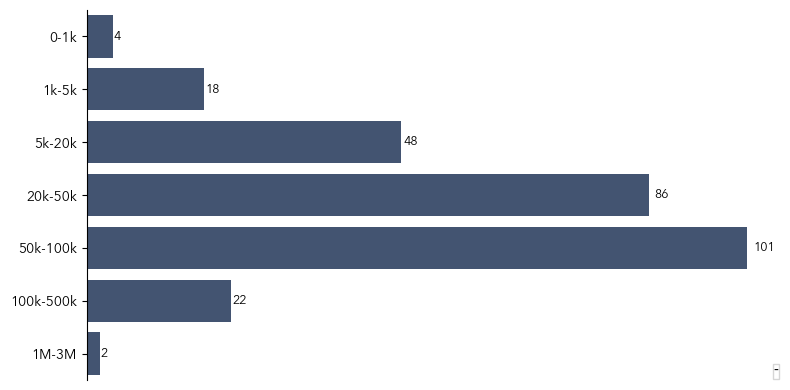

In [80]:
graf_barras_zeragens(
    df=zero_GARE15_qtde,
    filename='Zeragens_GARE15_Qtde_Cat.png',
    color='#3B5279'
)

In [81]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm

#Caminho PPT e Imagens
c_ppt = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\RELATORIOS\Passivo_Mensal.Inicial.pptx"
img_compra = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COMPRA_PF_E_PJ.png"
img_venda = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\VENDA_PF_E_PJ.png"
c_img_CAT_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\grafico_horizontal.png"
c_zer_img_qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_zeragem_cotistas.png"
c_img_CAT_GARE15_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\grafico_horizontal_GARE15.png"
c_img_zer_GARE15_Qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GARE15_Qtde_Cat.png"

#Abre a apresentação
prs=Presentation(c_ppt)

#Selecionando os slides e definindo a posição das imagens

slide1 = prs.slides[0]
slide2 = prs.slides[1]

#Imagem Compra
leftC = Cm(10.28)
topC = Cm(19.85)
widthC = Cm(7.53)
heightC = Cm(5.47)

#Imagem Venda
leftV = Cm(2.74)
topV = Cm(19.85)
widthV = Cm(7.68)
heightV = Cm(5.48)

#Imagem Categorias CxV
leftCxV = Cm(0.19)
topCxV = Cm(12.66)
widthCxV = Cm(9.71)
heightCxV = Cm(4.79)

#Imagem Categorias Zeragem Qtde
leftZ_qtde = Cm(11.08)
topZ_qtde = Cm(12.74)
widthZ_qtde = Cm(9.48)
heightZ_qtde = Cm(4.7)

#Imagem Compra e Venda - GARE15
leftCxV_GARE15 = Cm(0.15)
topCxV_GARE15 = Cm(17.95)
widthCxV_GARE15 = Cm(9.81)
heightCxV_GARE15 = Cm(4.84)

#Imagem Categorias Zeragem Qtde - GARE15
leftZ_qtde_GARE15 = Cm(11.12)
topZ_qtde_GARE15 = Cm(18.07)
widthZ_qtde_GARE15 = Cm(9.51)
heightZ_qtde_GARE15 = Cm(4.7)

#Adicionando as imagens aos slides

## Slide 1
slide1.shapes.add_picture(img_compra, leftC, topC, width=widthC, height=heightC)
slide1.shapes.add_picture(img_venda, leftV, topV, width=widthV, height=heightV)
## Slide2
slide2.shapes.add_picture(c_img_CAT_MCV, leftCxV, topCxV, width=widthCxV, height=heightCxV)
slide2.shapes.add_picture(c_zer_img_qtde, leftZ_qtde, topZ_qtde, width=widthZ_qtde, height=heightZ_qtde)
slide2.shapes.add_picture(c_img_CAT_GARE15_MCV, leftCxV_GARE15, topCxV_GARE15, width=widthCxV_GARE15, height=heightCxV_GARE15)
slide2.shapes.add_picture(c_img_zer_GARE15_Qtde, leftZ_qtde_GARE15, topZ_qtde_GARE15, width=widthZ_qtde_GARE15, height=heightZ_qtde_GARE15)

#Salvando a apresentação
prs.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\RELATORIOS\Passivo_Mensal.Final.pptx")


# ANALISE DO COMPORTAMENTO DAS CORRETORAS EM OUTROS FUNDOS

In [82]:
#Criando o dataframe de top10 corretoras para criar as tabelas
df_fundos_corretoras_vendas = df_fundos_corretoras.drop(columns=['Mês', 'Fundo', 'Compras - Vtt'])
#Somando o volume de vendas das corretoras
df_fundos_corretoras_vendas = df_fundos_corretoras_vendas.groupby(['Corretora'])['Vendas -Vtt'].sum()
#Transformando o resultado da linha acima em dataframe
corretoras_vendas = pd.DataFrame(df_fundos_corretoras_vendas)
#Organizando o dataframe 'corretoras_vendas' do maior para o menor, pegando os 10 maiores 
top10_corretoras_vendas = corretoras_vendas.sort_values(by = ['Vendas -Vtt'], ascending=False).iloc[:10, :]
#resetando o index
top10_corretoras_vendas = top10_corretoras_vendas.reset_index()
#pegando apenas a coluna de corretoras do df anterior
top10_corretoras = top10_corretoras_vendas['Corretora']
#No df principal com todas as corretoras e fundos e volumes e selecionando apenas as corretoras do top10
df_fundos_corretoras_top = df_fundos_corretoras[df_fundos_corretoras['Corretora'].isin(top10_corretoras)].copy()
#criando uma tabela com o vol de compra apenas das corretoras do top10 e dos fundos
tabela_compras = (df_fundos_corretoras_top.pivot_table(index='Fundo',
                                                       columns='Corretora',
                                                       values='Compras - Vtt',
                                                       aggfunc='sum',
                                                       fill_value=0))
#criando uma tabela com o vol de venda apenas das corretoras do top10 e dos fundos
tabela_vendas = (df_fundos_corretoras_top.pivot_table(index='Fundo',
                                                      columns = 'Corretora',
                                                      values = 'Vendas -Vtt',
                                                      aggfunc='sum',
                                                      fill_value=0))

#resetando os indices para seguir o padrão do top10 corretoras
tabela_compras = tabela_compras.reindex(columns=top10_corretoras)
tabela_vendas = tabela_vendas.reindex(columns=top10_corretoras)
#ajustando os volumes
tabela_compras[top10_corretoras] = (tabela_compras[top10_corretoras]/1000).round(0)
tabela_vendas[top10_corretoras] = (tabela_vendas[top10_corretoras]/1000).round(0)
#criando uma tabela de saldo final diminuindo o valor de compra pelo valor de venda
tabela_saldo = tabela_compras[top10_corretoras] - tabela_vendas[top10_corretoras]
tabela_saldo = tabela_saldo.reset_index()

In [83]:
tabela_compras

Corretora,XP,GENIAL,BTG PACTUAL,MIRAE,NECTON,ITAU,IDEAL,UBS,INTER,ATIVA
Fundo,,,,,,,,,,
ALZR11,13276.0,11436.0,5653.0,13.0,146.0,2054.0,2389.0,1404.0,2277.0,21.0
BTLG11,170177.0,58050.0,47830.0,240.0,5140.0,19246.0,8812.0,14727.0,11361.0,302.0
GARE11,143460.0,78247.0,18280.0,95.0,9059.0,11584.0,10919.0,7463.0,21368.0,122.0
HGLG11,86753.0,64367.0,47245.0,123.0,5.0,15937.0,6254.0,9181.0,15459.0,133.0
HGRU11,37847.0,27189.0,14072.0,21.0,126.0,12528.0,4815.0,8652.0,5024.0,68.0
KNRI11,29843.0,28404.0,12856.0,26.0,310.0,11944.0,7207.0,11053.0,4298.0,55.0
TRXF11,152843.0,79963.0,50241.0,126.0,192.0,42499.0,15159.0,29693.0,22001.0,182.0


In [84]:
tabela_vendas

Corretora,XP,GENIAL,BTG PACTUAL,MIRAE,NECTON,ITAU,IDEAL,UBS,INTER,ATIVA
Fundo,,,,,,,,,,
ALZR11,15212.0,10704.0,6257.0,5.0,828.0,1526.0,4000.0,1126.0,1447.0,86.0
BTLG11,177976.0,50855.0,36589.0,1864.0,33574.0,5267.0,13283.0,14613.0,30160.0,15112.0
GARE11,130913.0,82759.0,11671.0,51912.0,11748.0,3380.0,11819.0,8673.0,10042.0,2.0
HGLG11,121642.0,59750.0,42339.0,34.0,16757.0,22816.0,5331.0,10239.0,5693.0,41.0
HGRU11,49569.0,25328.0,12768.0,48.0,582.0,6746.0,9673.0,9712.0,2754.0,82.0
KNRI11,31816.0,26882.0,6854.0,65.0,2368.0,18500.0,8652.0,10664.0,3540.0,363.0
TRXF11,181176.0,65869.0,55147.0,55757.0,7008.0,13009.0,14886.0,10169.0,4183.0,16851.0


In [85]:

tabela_saldo

Corretora,Fundo,XP,GENIAL,BTG PACTUAL,MIRAE,NECTON,ITAU,IDEAL,UBS,INTER,ATIVA
0,ALZR11,-1936.0,732.0,-604.0,8.0,-682.0,528.0,-1611.0,278.0,830.0,-65.0
1,BTLG11,-7799.0,7195.0,11241.0,-1624.0,-28434.0,13979.0,-4471.0,114.0,-18799.0,-14810.0
2,GARE11,12547.0,-4512.0,6609.0,-51817.0,-2689.0,8204.0,-900.0,-1210.0,11326.0,120.0
3,HGLG11,-34889.0,4617.0,4906.0,89.0,-16752.0,-6879.0,923.0,-1058.0,9766.0,92.0
4,HGRU11,-11722.0,1861.0,1304.0,-27.0,-456.0,5782.0,-4858.0,-1060.0,2270.0,-14.0
5,KNRI11,-1973.0,1522.0,6002.0,-39.0,-2058.0,-6556.0,-1445.0,389.0,758.0,-308.0
6,TRXF11,-28333.0,14094.0,-4906.0,-55631.0,-6816.0,29490.0,273.0,19524.0,17818.0,-16669.0


In [86]:
# Caminhos
caminho_arquivo = r"C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_BASE\BASE_RELATORIO_PASSIVO_MENSAL_GARE.V5.xlsm"
caminho_destino = r"C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_MACRO\BASE_RELATORIO_PASSIVO_MENSAL_GARE.V5_MACRO.xlsm"

# DataFrames e locais onde serão colados
dfs_cola = [
    (TOP10_Venda, 'DADOS2', 'N4'),
    (TOP10_Compra, 'DADOS2', 'N19'),
    (top10pj_compra_final, 'DADOS2', 'M36'),
    (top10pj_venda_final, 'DADOS2', 'M51'),
    (tabela_compras, 'COMP_PASSIVOS', 'D15'),
    (tabela_vendas, 'COMP_PASSIVOS', 'D27'),
    (tabela_saldo, 'COMP_PASSIVOS', 'C39')
]

# Abrir Excel
app = None
wb = None

try:
    app = xw.App(visible=False)
    wb = app.books.open(caminho_arquivo)

    for df, aba, celula in dfs_cola:
        try:
            ws = wb.sheets[aba]
            ws.range(celula).value = df
        except Exception as e:
            print(f"❌ Erro ao colar na aba '{aba}' na célula {celula}: {e}")

    wb.save(caminho_destino)
    print(f"✅ Arquivo salvo com sucesso em: {caminho_destino}")

except Exception as e:
    print(f"❌ Erro geral ao processar o arquivo: {e}")

finally:
    if wb:
        wb.close()
    if app:
        app.quit()


✅ Arquivo salvo com sucesso em: C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_MACRO\BASE_RELATORIO_PASSIVO_MENSAL_GARE.V5_MACRO.xlsm


In [87]:
#SALVANDO O DATAFRAME EM .XLSX EM UMA PASTA ESPECIFICA

#MAPEANDO O CAMINHO E SALVANDO A PLANILHA TRATADA COMO .XLSX
#pasta_destino = r'C:\Users\LucasCavalcante\Desktop\old'
#CASO A PASTA NÃO EXISTA UMA SERA CRIADA IMEDIANTAMENT
#os.makedirs(pasta_destino, exist_ok=True)
#INSERE EM UMA VARIAVEL O CAMINHO E O NOME DO ARQUIVO
#caminho_arquivo_excel = os.path.join(pasta_destino, 'mensal_teste.xlsx')
#EXPORTA O ARQUIVO PARA CSV E O SALVA NA PASTA QUE O CAMINHO INDICA
#dfMENSAL_final.to_excel(caminho_arquivo_excel, index=False)

#print('Arquivo salvo com sucesso')